In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("football_players.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama            1000 non-null   object 
 1   Usia            1000 non-null   int64  
 2   Posisi          1000 non-null   object 
 3   Gol             1000 non-null   int64  
 4   Assist          1000 non-null   int64  
 5   Menit_Main      1000 non-null   int64  
 6   Rating          1000 non-null   float64
 7   Layak_Tim_Inti  1000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [5]:
df.head()

,Nama,Usia,Posisi,Gol,Assist,Menit_Main,Rating,Layak_Tim_Inti
0,Pemain_1,24,Kiper,4,1,2629,5.27,0
1,Pemain_2,37,Gelandang,4,5,2492,5.84,0
2,Pemain_3,32,Kiper,1,0,2125,7.28,0
3,Pemain_4,28,Kiper,4,1,3344,9.07,1
4,Pemain_5,25,Bek,5,4,1672,6.90,0


In [6]:
print(df.isnull().sum())

Nama              0
Usia              0
Posisi            0
Gol               0
Assist            0
Menit_Main        0
Rating            0
Layak_Tim_Inti    0
dtype: int64


In [7]:
le = LabelEncoder()
df["Posisi_encoded"] = le.fit_transform(df["Posisi"])
print(df[["Posisi", "Posisi_encoded"]].head())

      Posisi  Posisi_encoded
0      Kiper               2
1  Gelandang               1
2      Kiper               2
3      Kiper               2
4        Bek               0


In [8]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["Usia","Gol","Assist","Menit_Main","Rating"]] = scaler.fit_transform(
    df_scaled[["Usia","Gol","Assist","Menit_Main","Rating"]])

print(df_scaled.head())

       Nama      Usia     Posisi  ...    Rating  Layak_Tim_Inti  Posisi_encoded
0  Pemain_1 -0.647426      Kiper  ... -1.560335               0               2
1  Pemain_2  1.341829  Gelandang  ... -1.167411               0               1
2  Pemain_3  0.576731      Kiper  ... -0.174761               0               2
3  Pemain_4 -0.035348      Kiper  ...  1.059157               1               2
4  Pemain_5 -0.494407        Bek  ... -0.436711               0               0

[5 rows x 9 columns]


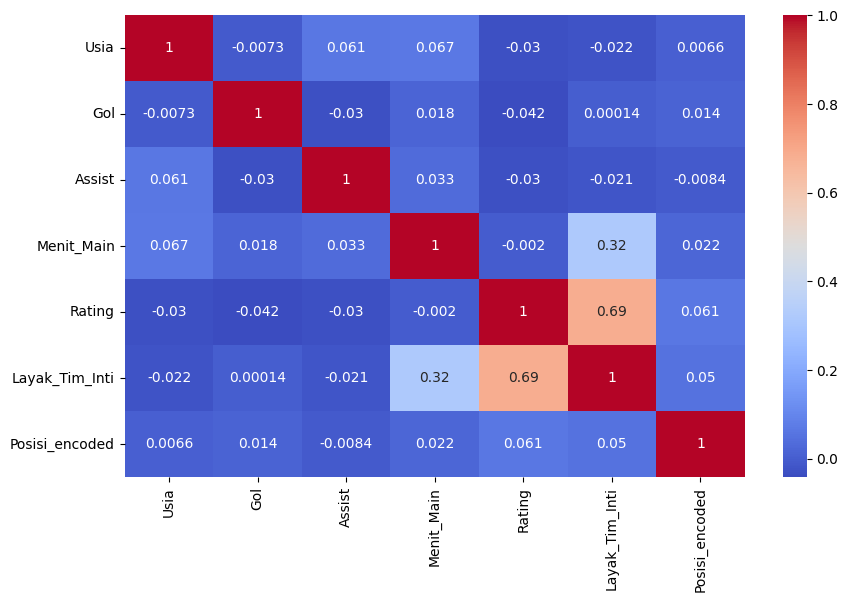

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [10]:
df.head()

,Nama,Usia,Posisi,Gol,Assist,Menit_Main,Rating,Layak_Tim_Inti,Posisi_encoded
0,Pemain_1,24,Kiper,4,1,2629,5.27,0,2
1,Pemain_2,37,Gelandang,4,5,2492,5.84,0,1
2,Pemain_3,32,Kiper,1,0,2125,7.28,0,2
3,Pemain_4,28,Kiper,4,1,3344,9.07,1,2
4,Pemain_5,25,Bek,5,4,1672,6.90,0,0


In [13]:
X = df[['Usia', 'Posisi_encoded', 'Gol', 'Assist', 'Menit_Main', 'Rating']]
y = df['Layak_Tim_Inti']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])


In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [20]:
y_pred = pipeline.predict(X_test)

In [21]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       122
           1       0.82      0.82      0.82        78

    accuracy                           0.86       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200



In [30]:
df[['Posisi','Posisi_encoded']]

,Posisi,Posisi_encoded
0,Kiper,2
1,Gelandang,1
2,Kiper,2
3,Kiper,2
4,Bek,0
...,...,...
995,Bek,0
996,Penyerang,3
997,Gelandang,1
998,Gelandang,1


In [ ]:
# --------------------------
# Input data pemain baru
# --------------------------
print("\nMasukkan data pemain:")
usia = float(input("Usia pemain: "))
gol = int(input("Jumlah gol: "))
assist = int(input("Jumlah assist: "))
menit_main = int(input("Jumlah menit bermain: "))
rating = float(input("Rating pemain: "))
posisi = input("Posisi pemain (Kiper, Bek, Gelandang, Penyerang): ")

# Encode posisi pakai LabelEncoder (le) yang sudah dilatih
posisi_encoded = le.transform([posisi])[0]

# Buat dataframe untuk pemain baru, ensuring column order matches X_train
pemain_baru = pd.DataFrame([[
    usia, posisi_encoded, gol, assist, menit_main, rating
]], columns=["Usia", "Posisi_encoded", "Gol", "Assist", "Menit_Main", "Rating"])


# --------------------------
# Prediksi using the pipeline
# --------------------------
prediksi = pipeline.predict(pemain_baru)[0]

if prediksi == 1:
    print("\n✅ Pemain ini LAYAK masuk tim inti.")
else:
    print("\n❌ Pemain ini TIDAK layak masuk tim inti.")


Masukkan data pemain:
